# Human Activity Recognition with Smartphone Data

The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. 

Dataset by UCI Machine Learning https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df=pd.read_csv("D:\Human_Activity\\train.csv")
df_test=pd.read_csv("D:\Human_Activity\\test.csv")
df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [6]:
print("Missing values:",df.isnull().values.any())

Missing values: False


In [7]:
df['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [8]:
df2=df.drop(['subject'],axis=1)
a=set(df['Activity'])
df2_test=df_test.drop(['subject'],axis=1)
print(a)

{'STANDING', 'SITTING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS', 'LAYING'}


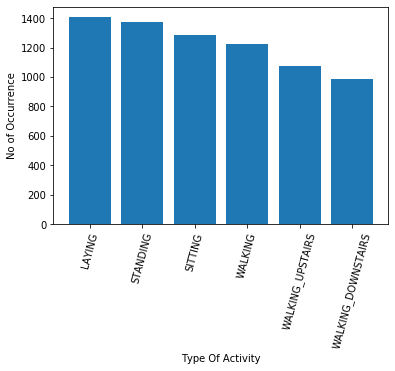

In [9]:
temp=df['Activity'].value_counts()

dta = pd.DataFrame({'Type': temp.index,
                   'Occurrence': temp.values
                  })

plt.bar(dta['Type'],dta['Occurrence'])
plt.xticks(rotation=75)
plt.xlabel('Type Of Activity')
plt.ylabel('No of Occurrence')
plt.show()

In [18]:
len(df2.columns)
X=pd.DataFrame(df2.drop('Activity',axis=1))
Y=df2.Activity.values.astype(object)
X_test=pd.DataFrame(df2_test.drop('Activity',axis=1))
Y_test=df2_test.Activity.values.astype(object)

from sklearn.preprocessing import StandardScaler

x_scaled=StandardScaler().fit_transform(X)
x_testscaled=StandardScaler().fit_transform(X_test)

from sklearn.preprocessing import LabelEncoder

y=LabelEncoder().fit_transform(Y)
y_test=LabelEncoder().fit_transform(Y_test)

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

clf=[SVC(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier()]
name=['Support Vector','Naive Bayes','Decision Tree','Random Forest']
print('Accuracy')
for model,names in zip(clf,name):
    print(names)
    print(cross_val_score(model,x_scaled,y,cv=5))


Accuracy
Support Vector
[0.91978246 0.90074779 0.93129252 0.92721088 0.95714286]
Naive Bayes
[0.6478586  0.58531611 0.80272109 0.71360544 0.68095238]
Decision Tree
[0.78925901 0.81645139 0.82585034 0.88163265 0.90136054]
Random Forest
[0.91162475 0.89598912 0.90340136 0.92585034 0.95238095]


In [59]:
params_grid = [{'kernel': ['rbf'], 'gamma': [0.001,0.01,0.1,1],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

from sklearn.model_selection import GridSearchCV


svm_model=GridSearchCV(SVC(),params_grid,cv=5,n_jobs=-1)
svm_model.fit(x_scaled,y)
print('Grid best parameter (max accuracy): ',svm_model.best_params_)
print('Grid best score: (accuracy)',svm_model.best_score_)


Grid best parameter (max accuracy):  {'C': 1, 'kernel': 'linear'}
Grid best score: (accuracy) 0.9358068230691325


In [63]:
svm_final=svm_model.best_estimator_
print("Training score: ",svm_final.score(x_scaled,y))
print("Testing score",svm_final.score(x_testscaled,y_test))

Training score:  0.9968715995647442
Testing score 0.9619952494061758


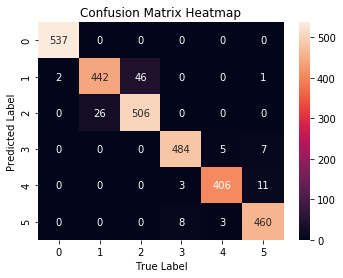

In [83]:
import seaborn as sb
from sklearn.metrics import confusion_matrix

svm_predicted=svm_final.predict(x_testscaled)
svm_confuse=confusion_matrix(y_test,svm_predicted)
df_cm=pd.DataFrame(svm_confuse)

plt.figure(figsize=(5.5,4))
sb.heatmap(df_cm,annot=True,fmt='g')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()


In [87]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(y_test,svm_predicted))
print("Training score: ",svm_final.score(x_scaled,y))
print("Testing score",svm_final.score(x_testscaled,y_test))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.94      0.90      0.92       491
           2       0.92      0.95      0.93       532
           3       0.98      0.98      0.98       496
           4       0.98      0.97      0.97       420
           5       0.96      0.98      0.97       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

Training score:  0.9968715995647442
Testing score 0.9619952494061758
